<a href="https://colab.research.google.com/github/Fuad3004/Data_Science/blob/main/Fires_in_the_Amazon_Rainforest_(Data_Aggregation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's reload our dataframe
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/amazon_fires.csv"
df = pd.read_csv(file_name, encoding = "ISO-8859-1")
new_columns = {'ano' : 'year',
               'estado': 'state',
               'mes': 'month',
               'numero': 'number_of_fires',
               'encontro': 'date'}
df.rename(columns = new_columns, inplace=True)
df['state'] = df['state'].str.title()

df['number_of_fires'] = df['number_of_fires'].str.strip(" Fires")
df['number_of_fires'] = df['number_of_fires'].fillna(0)
df['number_of_fires'] = df['number_of_fires'].astype(float)


# Introuding the Map Function
month_translations = {'Janeiro': 'January',
'Fevereiro': 'February',
'Março': 'March',
'Abril': 'April',
'Maio': 'May',
'Junho': 'June',
'Julho': 'July',
'Agosto': 'August',
'Setembro': 'September',
'Outubro': 'October',
'Novembro': 'November',
'Dezembro': 'December'}

df["month"] = df["month"].map(month_translations)
df.head(15)

,year,month,state,number_of_fires,date
0,1998,January,Acre,0.0,1/1/1998
1,1999,January,Acre,0.0,1/1/1999
2,2000,January,Acre,0.0,1/1/2000
3,2001,January,Acre,0.0,1/1/2001
4,2002,January,Acre,0.0,1/1/2002
5,2003,January,Acre,10.0,1/1/2003
6,2004,January,Acre,0.0,1/1/2004
7,2005,January,Acre,12.0,1/1/2005
8,2006,January,Acre,4.0,1/1/2006
9,2007,January,Acre,0.0,1/1/2007


#Grouping


In [5]:
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [2]:
df.groupby('state')

In [6]:
state_groups = df.groupby('state')
state_groups.get_group('Goias')

,year,month,state,number_of_fires,date
1913,1998,January,Goias,0.0,1/1/1998
1914,1999,January,Goias,11.0,1/1/1999
1915,2000,January,Goias,14.0,1/1/2000
1916,2001,January,Goias,11.0,1/1/2001
1917,2002,January,Goias,22.0,1/1/2002
...,...,...,...,...,...
2147,2012,December,Goias,32.0,1/1/2012
2148,2013,December,Goias,0.0,1/1/2013
2149,2014,December,Goias,45.0,1/1/2014
2150,2015,December,Goias,19.0,1/1/2015


In [7]:
state_groups.groups

{'Acre': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Alagoas': [239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, ...], 'Amapa': [479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 4

In [8]:
state_groups.size()

state
Acre                239
Alagoas             240
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      239
Goias               239
Maranhao            239
Mato Grosso         478
Minas Gerais        239
Paraiba             478
Pará                239
Pernambuco          239
Piau                239
Rio                 717
Rondonia            239
Roraima             239
Santa Catarina      239
Sao Paulo           239
Sergipe             239
Tocantins           239
dtype: int64

In [10]:
state_groups.sum()

<ipython-input-10-57f1a93893fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_groups.sum()


,year,number_of_fires
state,,
Acre,479783,17971.030
Alagoas,481800,4594.000
Amapa,479783,20108.576
Amazonas,479783,29890.129
Bahia,479783,43411.951
Ceara,479783,30395.042
Distrito Federal,479783,3501.000
Espirito Santo,479783,37002.276
Goias,479783,23362.852


In [11]:
state_groups.mean()

<ipython-input-11-6f43a4618cec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_groups.mean()


,year,number_of_fires
state,,
Acre,2007.460251,75.192594
Alagoas,2007.500000,19.141667
Amapa,2007.460251,84.136301
Amazonas,2007.460251,125.063301
Bahia,2007.460251,181.639962
Ceara,2007.460251,127.175908
Distrito Federal,2007.460251,14.648536
Espirito Santo,2007.460251,154.821238
Goias,2007.460251,97.752519


#Combining our groupby into one concise statement

In [12]:
df.groupby('state')['number_of_fires'].mean()

state
Acre                 75.192594
Alagoas              19.141667
Amapa                84.136301
Amazonas            125.063301
Bahia               181.639962
Ceara               127.175908
Distrito Federal     14.648536
Espirito Santo      154.821238
Goias                97.752519
Maranhao            103.929577
Mato Grosso         199.930910
Minas Gerais        154.821238
Paraiba             108.209033
Pará                 92.569640
Pernambuco           96.062762
Piau                157.082222
Rio                  62.482378
Rondonia             80.499703
Roraima              99.368510
Santa Catarina       97.752519
Sao Paulo           208.737230
Sergipe              13.251046
Tocantins           139.922632
Name: number_of_fires, dtype: float64

#Pivot Table

In [14]:
import numpy as np

df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean).reset_index()

,state,number_of_fires
0,Acre,75.192594
1,Alagoas,19.141667
2,Amapa,84.136301
3,Amazonas,125.063301
4,Bahia,181.639962
5,Ceara,127.175908
6,Distrito Federal,14.648536
7,Espirito Santo,154.821238
8,Goias,97.752519
9,Maranhao,103.929577


from matplotlib import pyplot as plt
_df_0['number_of_fires'].plot(kind='hist', bins=20, title='number_of_fires')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['number_of_fires'].plot(kind='line', figsize=(8, 4), title='number_of_fires')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'Brazil Fires by State'}, ylabel='state'>

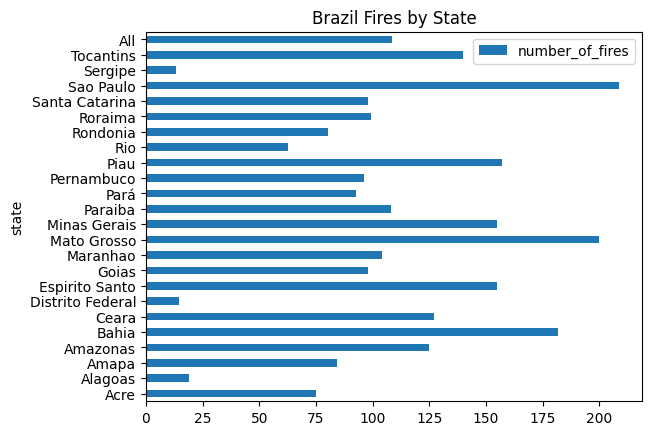

In [16]:
# Can be useful when creating a plot

fires_per_state = df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=True)

# We push the horizontal scale to the right just to make it more aesthetic
max_val = fires_per_state["number_of_fires"].max() + 10

fires_per_state.plot(kind='barh', title='Brazil Fires by State', xlim=(0,max_val), legend=True)

# Aggregating Multiple Columns Using Pivot Tables

In [18]:
df.shape[0]

6454

In [19]:
# Before we begin, let's create a column of fake date called "severity"
# in this column we'll use a rating of 1 - 5 to indicate severity of each fire

import numpy as np

df['severity'] = np.random.randint(1, 5, df.shape[0])
df.head(10)

,year,month,state,number_of_fires,date,severity
0,1998,January,Acre,0.0,1/1/1998,3
1,1999,January,Acre,0.0,1/1/1999,3
2,2000,January,Acre,0.0,1/1/2000,1
3,2001,January,Acre,0.0,1/1/2001,1
4,2002,January,Acre,0.0,1/1/2002,4
5,2003,January,Acre,10.0,1/1/2003,3
6,2004,January,Acre,0.0,1/1/2004,2
7,2005,January,Acre,12.0,1/1/2005,2
8,2006,January,Acre,4.0,1/1/2006,2
9,2007,January,Acre,0.0,1/1/2007,1


## Format for aggregating multiple columns of data


**DataFrame.pivot_table([column1_values, column2_values], column_index)**

In [21]:
# Now let's aggregate multiple columns
# Previous we did it like:
# df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean)

df.pivot_table(['number_of_fires', 'severity'], 'state').reset_index()

,state,number_of_fires,severity
0,Acre,75.192594,2.556485
1,Alagoas,19.141667,2.529167
2,Amapa,84.136301,2.426778
3,Amazonas,125.063301,2.343096
4,Bahia,181.639962,2.514644
5,Ceara,127.175908,2.564854
6,Distrito Federal,14.648536,2.527197
7,Espirito Santo,154.821238,2.464435
8,Goias,97.752519,2.447699
9,Maranhao,103.929577,2.594142


In [24]:
# Stating things more explicitly and adding Margins
df.pivot_table(values=['number_of_fires', 'severity'], index='state', aggfunc=np.mean, margins=True).reset_index()

,state,number_of_fires,severity
0,Acre,75.192594,2.556485
1,Alagoas,19.141667,2.529167
2,Amapa,84.136301,2.426778
3,Amazonas,125.063301,2.343096
4,Bahia,181.639962,2.514644
5,Ceara,127.175908,2.564854
6,Distrito Federal,14.648536,2.527197
7,Espirito Santo,154.821238,2.464435
8,Goias,97.752519,2.447699
9,Maranhao,103.929577,2.594142


In [25]:
# Aggregating with multiple functions on multiple columns

df.pivot_table(['number_of_fires', 'severity'], 'state', aggfunc=[np.mean, np.min, np.max], margins=True).reset_index()

state            mean                      amin           \
                     number_of_fires  severity number_of_fires severity   
0               Acre       75.192594  2.556485             0.0        1   
1            Alagoas       19.141667  2.529167             0.0        1   
2              Amapa       84.136301  2.426778             0.0        1   
3           Amazonas      125.063301  2.343096             0.0        1   
4              Bahia      181.639962  2.514644             0.0        1   
5              Ceara      127.175908  2.564854             0.0        1   
6   Distrito Federal       14.648536  2.527197             0.0        1   
7     Espirito Santo      154.821238  2.464435             0.0        1   
8              Goias       97.752519  2.447699             0.0        1   
9           Maranhao      103.929577  2.594142             0.0        1   
10       Mato Grosso      199.930910  2.472803             0.0        1   
11      Minas Gerais      154.821238  2.497908             0.0        1   
12           Paraiba      108.209033  2.435146             0.0        1   
13              Pará       92.569640  2.543933             0.0        1   
14        Pernambuco       96.062762  2.552301             0.0        1   
15              Piau      157.082222  2.326360             0.0        1   
16               Rio       62.482378  2.489540             0.0        1   
17          Rondonia       80.499703  2.451883             0.0        1   
18           Roraima       99.368510  2.527197             0.0        1   
19    Santa Catarina       97.752519  2.451883             0.0        1   
20         Sao Paulo      208.737230  2.485356             0.0        1   
21           Sergipe       13.251046  2.564854             0.0        1   
22         Tocantins      139.922632  2.389121             0.0        1   
23               All      108.404542  2.483111             0.0        1   

              amax           
   number_of_fires severity  
0            960.0        4  
1            162.0        4  
2            969.0        4  
3            998.0        4  
4            995.0        4  
5            995.0        4  
6            196.0        4  
7            959.0        4  
8            759.0        4  
9            972.0        4  
10           979.0        4  
11           959.0        4  
12           987.0        4  
13           971.0        4  
14           859.0        4  
15           943.0        4  
16           885.0        4  
17           969.0        4  
18           820.0        4  
19           759.0        4  
20           981.0        4  
21           198.0        4  
22           989.0        4  
23           998.0        4

# Learning to use GroupBy Agg

### The syntax is as follows:

**DataFrame.groupby(index)[column1].agg(function)**

In [29]:
# Similarly we can use the 'agg' function with groupbys

df.groupby('state')['number_of_fires'].agg(np.mean).reset_index()

,state,number_of_fires
0,Acre,75.192594
1,Alagoas,19.141667
2,Amapa,84.136301
3,Amazonas,125.063301
4,Bahia,181.639962
5,Ceara,127.175908
6,Distrito Federal,14.648536
7,Espirito Santo,154.821238
8,Goias,97.752519
9,Maranhao,103.929577


In [28]:
## Applying it to multiple columns

df.groupby('state')['number_of_fires', 'severity'].agg(np.mean).reset_index()

<ipython-input-28-5d4f6b01f5c9>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('state')['number_of_fires', 'severity'].agg(np.mean).reset_index()


,state,number_of_fires,severity
0,Acre,75.192594,2.556485
1,Alagoas,19.141667,2.529167
2,Amapa,84.136301,2.426778
3,Amazonas,125.063301,2.343096
4,Bahia,181.639962,2.514644
5,Ceara,127.175908,2.564854
6,Distrito Federal,14.648536,2.527197
7,Espirito Santo,154.821238,2.464435
8,Goias,97.752519,2.447699
9,Maranhao,103.929577,2.594142


In [30]:
## Applying multiple functions

df.groupby('state')['number_of_fires', 'severity'].agg([np.mean, np.max]).reset_index()

<ipython-input-30-86b161171205>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('state')['number_of_fires', 'severity'].agg([np.mean, np.max]).reset_index()


state number_of_fires         severity     
                                mean   amax      mean amax
0               Acre       75.192594  960.0  2.556485    4
1            Alagoas       19.141667  162.0  2.529167    4
2              Amapa       84.136301  969.0  2.426778    4
3           Amazonas      125.063301  998.0  2.343096    4
4              Bahia      181.639962  995.0  2.514644    4
5              Ceara      127.175908  995.0  2.564854    4
6   Distrito Federal       14.648536  196.0  2.527197    4
7     Espirito Santo      154.821238  959.0  2.464435    4
8              Goias       97.752519  759.0  2.447699    4
9           Maranhao      103.929577  972.0  2.594142    4
10       Mato Grosso      199.930910  979.0  2.472803    4
11      Minas Gerais      154.821238  959.0  2.497908    4
12           Paraiba      108.209033  987.0  2.435146    4
13              Pará       92.569640  971.0  2.543933    4
14        Pernambuco       96.062762  859.0  2.552301    4
15              Piau      157.082222  943.0  2.326360    4
16               Rio       62.482378  885.0  2.489540    4
17          Rondonia       80.499703  969.0  2.451883    4
18           Roraima       99.368510  820.0  2.527197    4
19    Santa Catarina       97.752519  759.0  2.451883    4
20         Sao Paulo      208.737230  981.0  2.485356    4
21           Sergipe       13.251046  198.0  2.564854    4
22         Tocantins      139.922632  989.0  2.389121    4

# Using custom Agg functions

In [34]:
def max_minus_mean(grouped_data):
    return(grouped_data.max() - grouped_data.mean())

df.groupby('state')['number_of_fires'].agg(max_minus_mean)

state
Acre                884.807406
Alagoas             142.858333
Amapa               884.863699
Amazonas            872.936699
Bahia               813.360038
Ceara               867.824092
Distrito Federal    181.351464
Espirito Santo      804.178762
Goias               661.247481
Maranhao            868.070423
Mato Grosso         779.069090
Minas Gerais        804.178762
Paraiba             878.790967
Pará                878.430360
Pernambuco          762.937238
Piau                785.917778
Rio                 822.517622
Rondonia            888.500297
Roraima             720.631490
Santa Catarina      661.247481
Sao Paulo           772.262770
Sergipe             184.748954
Tocantins           849.077368
Name: number_of_fires, dtype: float64

In [32]:
# Converting our series result back into a dataFrame

pd.DataFrame(df.groupby('state')['number_of_fires'].agg(max_minus_mean)).reset_index()

,state,number_of_fires
0,Acre,884.807406
1,Alagoas,142.858333
2,Amapa,884.863699
3,Amazonas,872.936699
4,Bahia,813.360038
5,Ceara,867.824092
6,Distrito Federal,181.351464
7,Espirito Santo,804.178762
8,Goias,661.247481
9,Maranhao,868.070423
